# Churn Prediction Challenge

## Introdução
O estudo a seguir apresenta uma análise sobre uma base de dados contendo como variável dependente a informação se determinado cliente virou churn ou não. Adicionalmente, técnicas de Machine Learning foram aplicadas com o objetivo de prever se determinado cliente resultaria ou não em churn.
O raciocínio de trabalho levado adiante neste estudo é apresentado no sumário abaixo.

<font color = 'green'>
Conteúdo: 

1. [Carregar e Verificar os Dados](#1)
1. [Descrição das variáveis](#2)
    * [Variáveis Categóricas](#4)
    * [Variáveis Numéricas](#5)
1. [Análise Básica do Churn](#6)
1. [Valores Faltantes](#7)
    * [Encontrando Valores Faltantes](#8)
    * [Preenchendo Valores Faltantes](#9)
1. [Visualização dos Dados](#10)    
    * [Box plot das variáveis numéricas](#11)
1. [Detecção de Outliers](#12)
1. [Feature Engineering](#13)    
    * [One-hot encoding](#14)
    * [Ordem crescente das correlações entre as variáveis e o churn](#15)
1. [Modelos](#16)
    * [Separação entre treino e teste](#17)        
1. [Conclusão](#18)
1. [Sugestões de Melhoria](#19)

In [77]:
# carregando bibliotecas básicas de manipulação de dados
import numpy as np 
import pandas as pd 
# bibliotecas de visualização
import matplotlib.pyplot as plt 
import seaborn as sns 

from collections import Counter

import warnings
warnings.filterwarnings("ignore") #Ignorar alguns alertas

<a id = "1"></a><br>
# 1 | Carregar e Verificar os Dados

In [78]:
d = pd.read_csv('churn_challenge_data.csv')
df = d.copy() 
df

,Customer_ID,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,...,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1000001,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,...,0.000000,1652,4228.00000,22.500,1504.62,0.0,0.0,6.333333,2,0.0
1,1000002,0,C,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,...,0.333333,14654,26400.00000,37.425,2851.68,1.0,0.0,61.333333,1,9.1
2,1000003,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,...,0.000000,7903,24385.05333,16.990,2155.91,0.0,0.0,2.666667,1,0.0
3,1000004,0,C,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,...,0.000000,1502,3065.00000,38.000,2000.90,0.0,0.0,0.000000,1,0.0
4,1000005,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,...,0.000000,4485,14028.00000,71.980,2181.12,0.0,0.0,77.000000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1099996,1,NaN,1,9494.00,3751,1561.14,5.0,LOS ANGELES AREA,N,...,0.000000,3771,9534.00000,NaN,1594.83,0.0,0.0,7.666667,1,NaN
99996,1099997,0,I,1,8805.00,3629,1451.85,3.0,LOS ANGELES AREA,Y,...,0.333333,3675,8887.00000,NaN,1517.10,0.0,0.0,12.333333,1,NaN
99997,1099998,0,NaN,1,9234.00,1238,1055.93,1.0,SOUTHWEST AREA,N,...,0.000000,1271,9336.00000,NaN,1114.91,0.0,0.0,0.000000,1,NaN
99998,1099999,0,NaN,1,20488.00,9921,2593.26,NaN,SOUTHWEST AREA,N,...,1.000000,10082,20784.00000,NaN,2669.20,0.0,0.0,117.333333,1,NaN


In [79]:
print(df.shape) # linhas x colunas
print(df.ndim) # dimensão do dado
print(df.size) # tamanho

(100000, 99)
2
9900000


In [119]:
df.describe(include=['O']) # Somente variáveis do tipo objeto

,area,asl_flag,creditcd,dualband,ethnic,hnd_webcap,kid0_2,kid11_15,kid16_17,kid3_5,kid6_10,marital,new_cell,refurb_new
count,99960,100000,98268,99999,98268,100000,98268,98268,98268,98268,98268,98268,100000,99999
unique,19,2,2,4,17,3,2,2,2,2,2,5,3,2
top,NEW YORK CITY AREA,N,Y,Y,N,WCMB,U,U,U,U,U,U,U,N
freq,11098,86064,67234,72265,33389,75733,94256,89454,88304,93572,90195,37333,66914,85593


In [120]:
df.describe() # Somente variáveis numéricas

,churn,actvsubs,adjmou,adjqty,adjrev,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,...,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,98268.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.495620,1.358960,7546.314699,2836.366920,960.111528,145.752225,519.641210,180.337320,59.193330,509.634576,...,0.284720,2877.141930,7648.363833,46.179136,1031.924988,0.188820,0.029810,27.784905,1.548140,13.295062
std,0.499983,0.655555,8594.889729,3756.513882,840.170815,159.348094,533.634073,192.725835,46.695429,489.562483,...,1.092101,3790.863474,8666.558293,23.581283,852.907511,0.391368,0.496970,38.358734,1.075255,30.002391
min,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,-26.915000,3.650000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,2474.000000,868.000000,452.180000,38.333333,152.000000,55.000000,33.000000,168.000000,...,0.000000,889.000000,2529.000000,30.000000,518.980000,0.000000,0.000000,5.000000,1.000000,0.000000
50%,0.000000,1.000000,5102.500000,1789.000000,737.760000,101.000000,358.000000,125.000000,48.000000,377.000000,...,0.000000,1822.000000,5191.500000,44.990000,804.530000,0.000000,0.000000,16.000000,1.000000,0.700000
75%,1.000000,2.000000,9661.000000,3442.000000,1188.175000,199.666667,711.000000,240.000000,71.000000,683.000000,...,0.333333,3492.000000,9776.000000,59.990000,1263.767500,0.000000,0.000000,36.000000,2.000000,13.950000
max,1.000000,53.000000,232855.100000,98705.000000,27071.300000,2289.000000,7716.000000,3909.000000,1593.000000,7217.000000,...,66.000000,98874.000000,233419.096700,409.990000,27321.500000,1.000000,81.666667,848.666667,196.000000,896.087500


- A tabela acima mostra um resumo estatístico dos dados
- Quantidade, média, desvio padrão, quartils, máximos e mínimos

<a id = "2"></a><br>
# 2 | Descrição das variáveis
## A descrição das variáveis se encontra no arquivo readme.txt

In [82]:
# Verificar os tipos das variáveis e se contem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       100000 non-null  int64  
 1   churn             100000 non-null  int64  
 2   HHstatin          62077 non-null   object 
 3   actvsubs          100000 non-null  int64  
 4   adjmou            100000 non-null  float64
 5   adjqty            100000 non-null  int64  
 6   adjrev            100000 non-null  float64
 7   adults            76981 non-null   float64
 8   area              99960 non-null   object 
 9   asl_flag          100000 non-null  object 
 10  attempt_Mean      100000 non-null  float64
 11  avg3mou           100000 non-null  int64  
 12  avg3qty           100000 non-null  int64  
 13  avg3rev           100000 non-null  int64  
 14  avg6mou           97161 non-null   float64
 15  avg6qty           97161 non-null   float64
 16  avg6rev           971

In [83]:
# Customer_ID é uma variável única, ótima para identificar o registro no banco de dados - inútil para machine learning
df.drop(["Customer_ID"], axis = 1, inplace=True)

In [84]:
# Listagem das 3 categorias de dados
def columns_categories(data_set):
    object_columns = []
    float_columns = []
    int_columns = []
    other_columns = []
    n,m,s=0,0,0
    for i in data_set.columns.values:
        if data_set[i].dtypes=='object':
            object_columns.append(i)
            n+=1
        if data_set[i].dtypes=='int':
            int_columns.append(i)
            m+=1
        if data_set[i].dtypes=='float':
            float_columns.append(i)
            s+=1
    print('object(',n,'):\n',object_columns)
    print('int(',m,'):\n',int_columns)
    print('float(',s,'):\n',float_columns)

In [ ]:
columns_categories(df)

<a id = "4"></a><br>
## Variáveis Categóricas

In [86]:
obj_col = df.select_dtypes(include = 'object').columns
obj_col

Index(['HHstatin', 'area', 'asl_flag', 'crclscod', 'creditcd', 'dualband',
       'dwllsize', 'dwlltype', 'ethnic', 'hnd_webcap', 'infobase', 'kid0_2',
       'kid11_15', 'kid16_17', 'kid3_5', 'kid6_10', 'marital', 'new_cell',
       'ownrent', 'prizm_social_one', 'refurb_new'],
      dtype='object')

- Relação do churn com variáveis categóricas

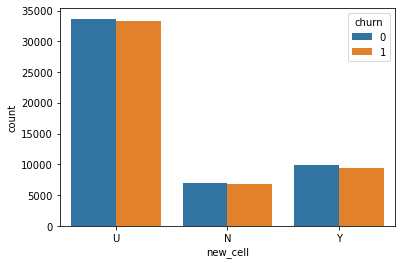

churn,0,1
new_cell,,
N,0.503373,0.496627
U,0.503049,0.496951
Y,0.509715,0.490285


In [87]:
# new_cell vs churn
sns.countplot(x= "new_cell", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('new_cell')["churn"].value_counts(normalize=True).unstack(fill_value=0)

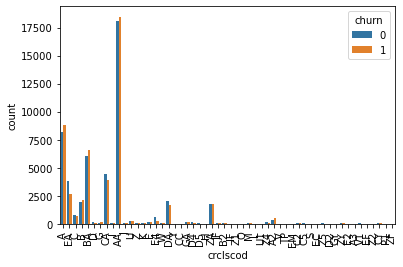

churn,0,1
crclscod,,
A,0.482702,0.517298
A2,0.384437,0.615563
A3,0.333333,0.666667
AA,0.494316,0.505684
B,0.475669,0.524331
B2,0.467890,0.532110
BA,0.478724,0.521276
C,0.520604,0.479396
C2,0.527778,0.472222


In [88]:
# crclscod vs churn
sns.countplot(x= "crclscod", hue="churn", data=df);
plt.xticks(rotation = 90)
plt.show()
df.groupby('crclscod')["churn"].value_counts(normalize=True).unstack(fill_value=0)

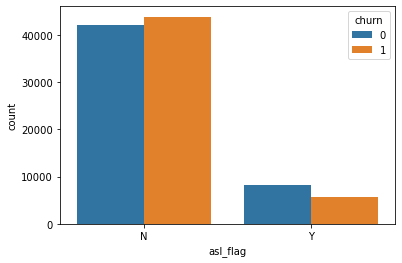

churn,0,1
asl_flag,,
N,0.490402,0.509598
Y,0.590700,0.409300


In [89]:
# asl_flag vs churn
sns.countplot(x= "asl_flag", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('asl_flag')["churn"].value_counts(normalize=True).unstack(fill_value=0)

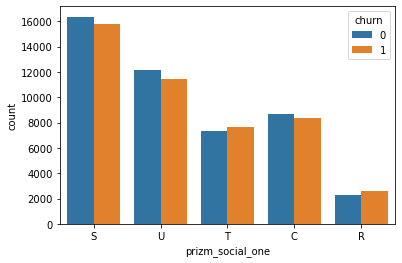

churn,0,1
prizm_social_one,,
C,0.509226,0.490774
R,0.472932,0.527068
S,0.509238,0.490762
T,0.491627,0.508373
U,0.515182,0.484818


In [90]:
# prizm_social_one vs churn
sns.countplot(x= "prizm_social_one", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('prizm_social_one')["churn"].value_counts(normalize=True).unstack(fill_value=0)

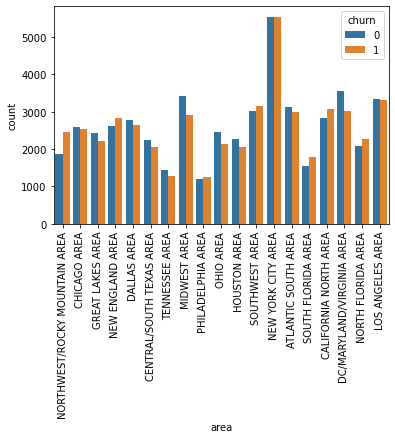

churn,0,1
area,,
ATLANTIC SOUTH AREA,0.510274,0.489726
CALIFORNIA NORTH AREA,0.478945,0.521055
CENTRAL/SOUTH TEXAS AREA,0.521517,0.478483
CHICAGO AREA,0.504766,0.495234
DALLAS AREA,0.512532,0.487468
DC/MARYLAND/VIRGINIA AREA,0.539668,0.460332
GREAT LAKES AREA,0.523553,0.476447
HOUSTON AREA,0.524994,0.475006
LOS ANGELES AREA,0.501808,0.498192


In [91]:
# area vs churn
sns.countplot(x= "area", hue="churn", data=df);
plt.xticks(rotation = 90)
plt.show()
df.groupby('area')["churn"].value_counts(normalize=True).unstack(fill_value=0)

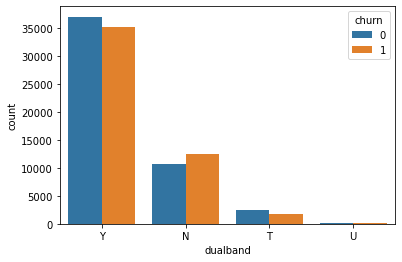

churn,0,1
dualband,,
N,0.463183,0.536817
T,0.578082,0.421918
U,0.653153,0.346847
Y,0.512738,0.487262


In [92]:
# dualband vs churn
sns.countplot(x= "dualband", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dualband')["churn"].value_counts(normalize=True).unstack(fill_value=0)

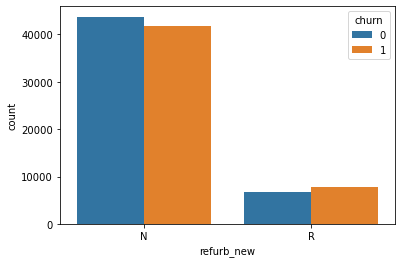

churn,0,1
refurb_new,,
N,0.510895,0.489105
R,0.465639,0.534361


In [93]:
# refurb_new vs churn
sns.countplot(x= "refurb_new", hue="churn", data=df);
plt.xticks()
plt.show()

df.groupby('refurb_new')["churn"].value_counts(normalize=True).unstack(fill_value=0)

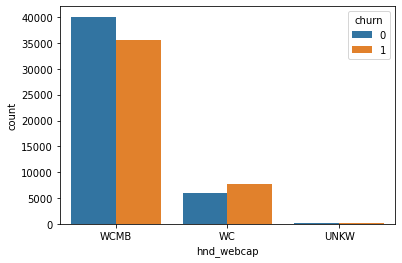

churn,0,1
hnd_webcap,,
UNKW,0.634043,0.365957
WC,0.436972,0.563028
WCMB,0.529201,0.470799


In [94]:
# hnd_webcap vs churn
sns.countplot(x= "hnd_webcap", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('hnd_webcap')["churn"].value_counts(normalize=True).unstack(fill_value=0)

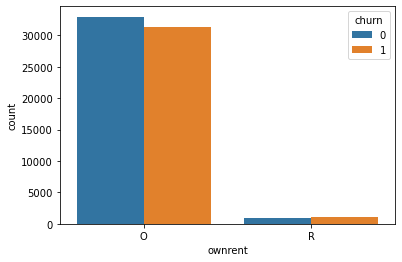

churn,0,1
ownrent,,
O,0.512803,0.487197
R,0.480597,0.519403


In [95]:
sns.countplot(x= "ownrent", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('ownrent')["churn"].value_counts(normalize=True).unstack(fill_value=0)

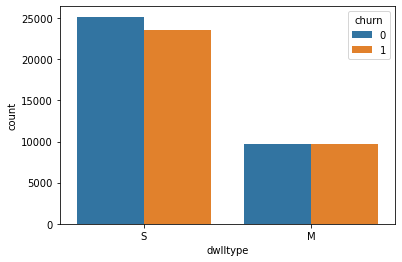

churn,0,1
dwlltype,,
M,0.501345,0.498655
S,0.516069,0.483931


In [96]:
sns.countplot(x= "dwlltype", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dwlltype')["churn"].value_counts(normalize=True).unstack(fill_value=0)

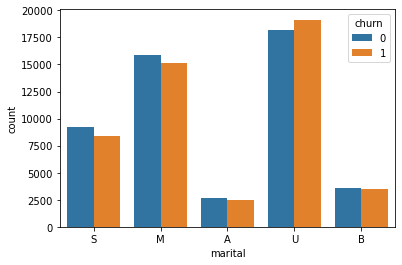

churn,0,1
marital,,
A,0.510311,0.489689
B,0.503092,0.496908
M,0.511336,0.488664
S,0.525330,0.474670
U,0.487344,0.512656


In [97]:
sns.countplot(x= "marital", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('marital')["churn"].value_counts(normalize=True).unstack(fill_value=0)

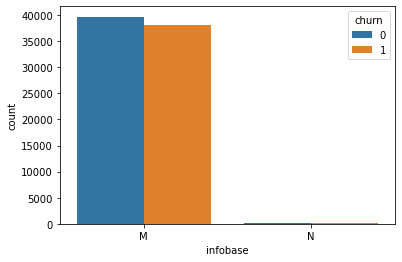

churn,0,1
infobase,,
M,0.510779,0.489221
N,0.669643,0.330357


In [98]:
sns.countplot(x= "infobase", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('infobase')["churn"].value_counts(normalize=True).unstack(fill_value=0)

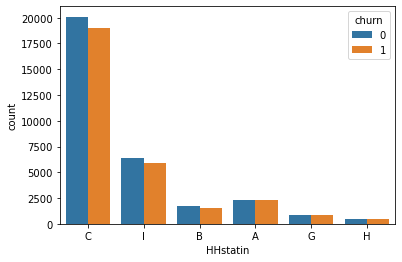

churn,0,1
HHstatin,,
A,0.500857,0.499143
B,0.520333,0.479667
C,0.513623,0.486377
G,0.497169,0.502831
H,0.477790,0.522210
I,0.519025,0.480975


In [99]:
sns.countplot(x= "HHstatin", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('HHstatin')["churn"].value_counts(normalize=True).unstack(fill_value=0)

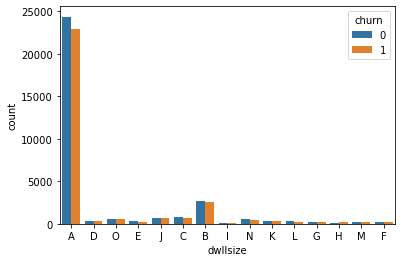

churn,0,1
dwllsize,,
A,0.515772,0.484228
B,0.504323,0.495677
C,0.524382,0.475618
D,0.491299,0.508701
E,0.539595,0.460405
F,0.507317,0.492683
G,0.515068,0.484932
H,0.480132,0.519868
I,0.466418,0.533582


In [100]:
sns.countplot(x= "dwllsize", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dwllsize')["churn"].value_counts(normalize=True).unstack(fill_value=0)

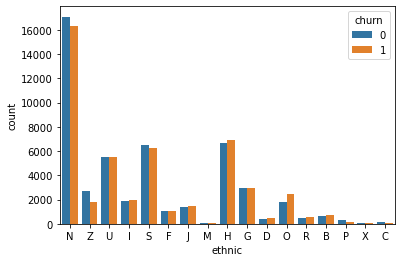

churn,0,1
ethnic,,
B,0.446870,0.553130
C,0.684426,0.315574
D,0.466513,0.533487
F,0.496474,0.503526
G,0.504227,0.495773
H,0.491669,0.508331
I,0.487798,0.512202
J,0.483791,0.516209
M,0.463087,0.536913


In [101]:
sns.countplot(x= "ethnic", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('ethnic')["churn"].value_counts(normalize=True).unstack(fill_value=0)

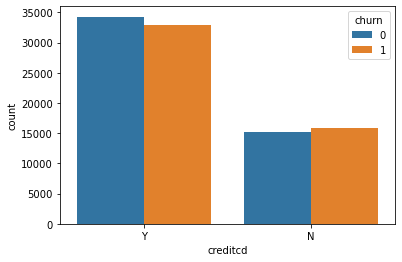

churn,0,1
creditcd,,
N,0.491719,0.508281
Y,0.509787,0.490213


In [102]:
# creditcd vs churn
sns.countplot(x= "creditcd", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('creditcd')["churn"].value_counts(normalize=True).unstack(fill_value=0)

<a id = "5"></a><br>
## Variáveis Numéricas

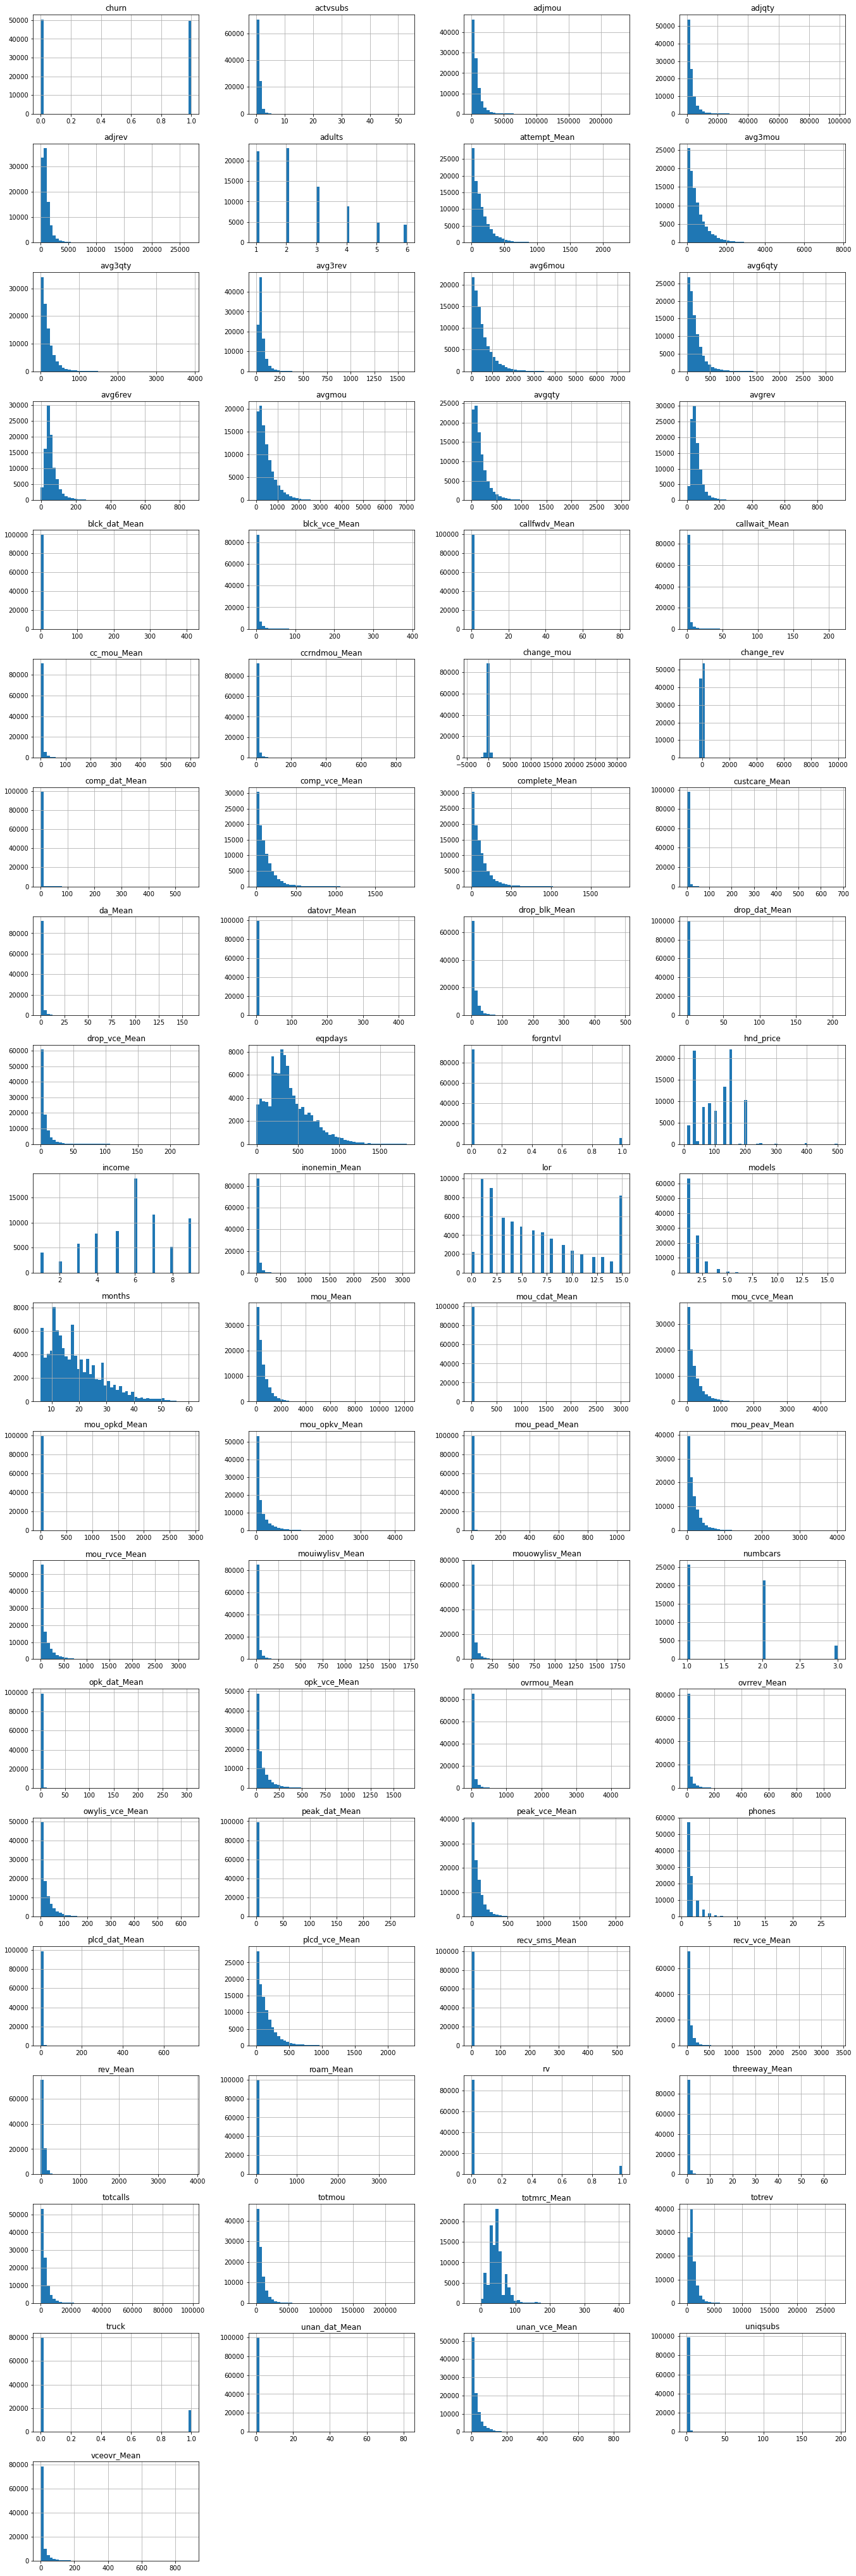

In [103]:
df.iloc[:,:].hist(bins=50,figsize=(23,74),layout=(20,4));

<a id = "6"></a><br>
# 3 | Análise Básica do Churn

In [104]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("clientes retidos: "+ str(stay))
print ("clientes churnados: "+ str(churn))

clientes retidos: 31851
clientes churnados: 30226


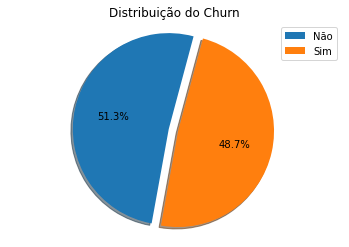

In [105]:
#churn rate
sizes = [31851,30226]
labels='Não','Sim'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Distribuição do Churn")

ax1.legend(labels)

plt.show()

<a id = "7"></a><br>
# 4 | Valores Faltantes
- Encontrar e preencher valores faltantes

<a id = "8"></a><br>
## Encontrando valores faltantes

In [106]:
df.columns[df.isnull().any()]

Index(['HHstatin', 'adults', 'area', 'avg6mou', 'avg6qty', 'avg6rev',
       'change_mou', 'change_rev', 'creditcd', 'da_Mean', 'datovr_Mean',
       'dualband', 'dwllsize', 'dwlltype', 'eqpdays', 'ethnic', 'forgntvl',
       'hnd_price', 'hnd_webcap', 'income', 'infobase', 'kid0_2', 'kid11_15',
       'kid16_17', 'kid3_5', 'kid6_10', 'lor', 'marital', 'models', 'mou_Mean',
       'numbcars', 'ovrmou_Mean', 'ovrrev_Mean', 'ownrent', 'phones',
       'prizm_social_one', 'refurb_new', 'rev_Mean', 'roam_Mean', 'rv',
       'totmrc_Mean', 'truck', 'vceovr_Mean'],
      dtype='object')

In [107]:
# Variáveis com dados faltantes
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Porcentagem com dados faltantes
pd.DataFrame({'Nº dados faltantes': miss, '% de dados faltantes': miss_per.values})

,Nº dados faltantes,% de dados faltantes
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


<a id = "9"></a><br>
## Preenchendo valores faltantes - Colocando categoria de valor desconhecido ou utilizando a média

In [108]:
# Eliminando colunas com alta porcentagem de dados faltantes
df.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor','income','adults','prizm_social_one','infobase','crclscod'],axis=1,inplace=True)

In [109]:
df['hnd_webcap']=df['hnd_webcap'].fillna('UNKW') # Handset web capability - preenchedo dados faltantes com categoria UNKW
#Preenchendo os falores faltantes com a média 
df['avg6qty']=df['avg6qty'].fillna(df['avg6qty'].mean()) # Average monthly number of calls over the previous six months
df['avg6rev']=df['avg6rev'].fillna(df['avg6rev'].mean()) # Average monthly revenue over the life of the customer
df['avg6mou']=df['avg6mou'].fillna(df['avg6mou'].mean()) # Average monthly minutes of use over the life of the customer

df['change_mou']=df['change_mou'].fillna(df['change_mou'].mean()) # Percentage change in monthly minutes of use vs previous three month average
df['change_rev']=df['change_rev'].fillna(df['change_rev'].mean()) # Percentage change in monthly revenue vs previous three month average

df['rev_Mean']=df['rev_Mean'].fillna(df['rev_Mean'].mean())
df['totmrc_Mean']=df['totmrc_Mean'].fillna(df['totmrc_Mean'].mean())
df['da_Mean']=df['da_Mean'].fillna(df['da_Mean'].mean())
df['ovrmou_Mean']=df['ovrmou_Mean'].fillna(df['ovrmou_Mean'].mean())
df['ovrrev_Mean']=df['ovrrev_Mean'].fillna(df['ovrrev_Mean'].mean())
df['vceovr_Mean']=df['vceovr_Mean'].fillna(df['vceovr_Mean'].mean())
df['datovr_Mean']=df['datovr_Mean'].fillna(df['datovr_Mean'].mean())
df['roam_Mean']=df['roam_Mean'].fillna(df['roam_Mean'].mean())
df['mou_Mean']=df['mou_Mean'].fillna(df['mou_Mean'].mean())


In [ ]:
#Visualizando valores inválidos
import missingno as msno
msno.matrix(df);

In [ ]:
df.dropna(inplace=True)

In [ ]:
sum(df.isnull().sum()>0)

0

In [ ]:
columns_categories(df)

object( 14 ):
 ['area', 'asl_flag', 'creditcd', 'dualband', 'ethnic', 'hnd_webcap', 'kid0_2', 'kid11_15', 'kid16_17', 'kid3_5', 'kid6_10', 'marital', 'new_cell', 'refurb_new']
int( 0 ):
 []
float( 64 ):
 ['adjmou', 'adjrev', 'attempt_Mean', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'avgqty', 'avgrev', 'blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'da_Mean', 'datovr_Mean', 'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'eqpdays', 'forgntvl', 'hnd_price', 'inonemin_Mean', 'models', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouowylisv_Mean', 'opk_dat_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'peak_vce_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'recv_vce_Mean'

In [ ]:
numerical_features = ['months', 'uniqsubs', 'actvsubs', 'totcalls', 'avg3qty', 'avg3rev','rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
                      'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 
                      'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cvce_Mean', 
                      'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 
                      'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 
                      'totrev', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

In [ ]:
for i in numerical_features:    
    f_sqrt= (lambda x: np.sqrt(abs(x)) if (x>=1) or (x<=-1) else x)
    df[i] = df[i].apply(f_sqrt)

<a id = "10"></a><br>
# 5 | Visualização dos dados

<a id = "11"></a><br>
# Box plot das variáveis numéricas

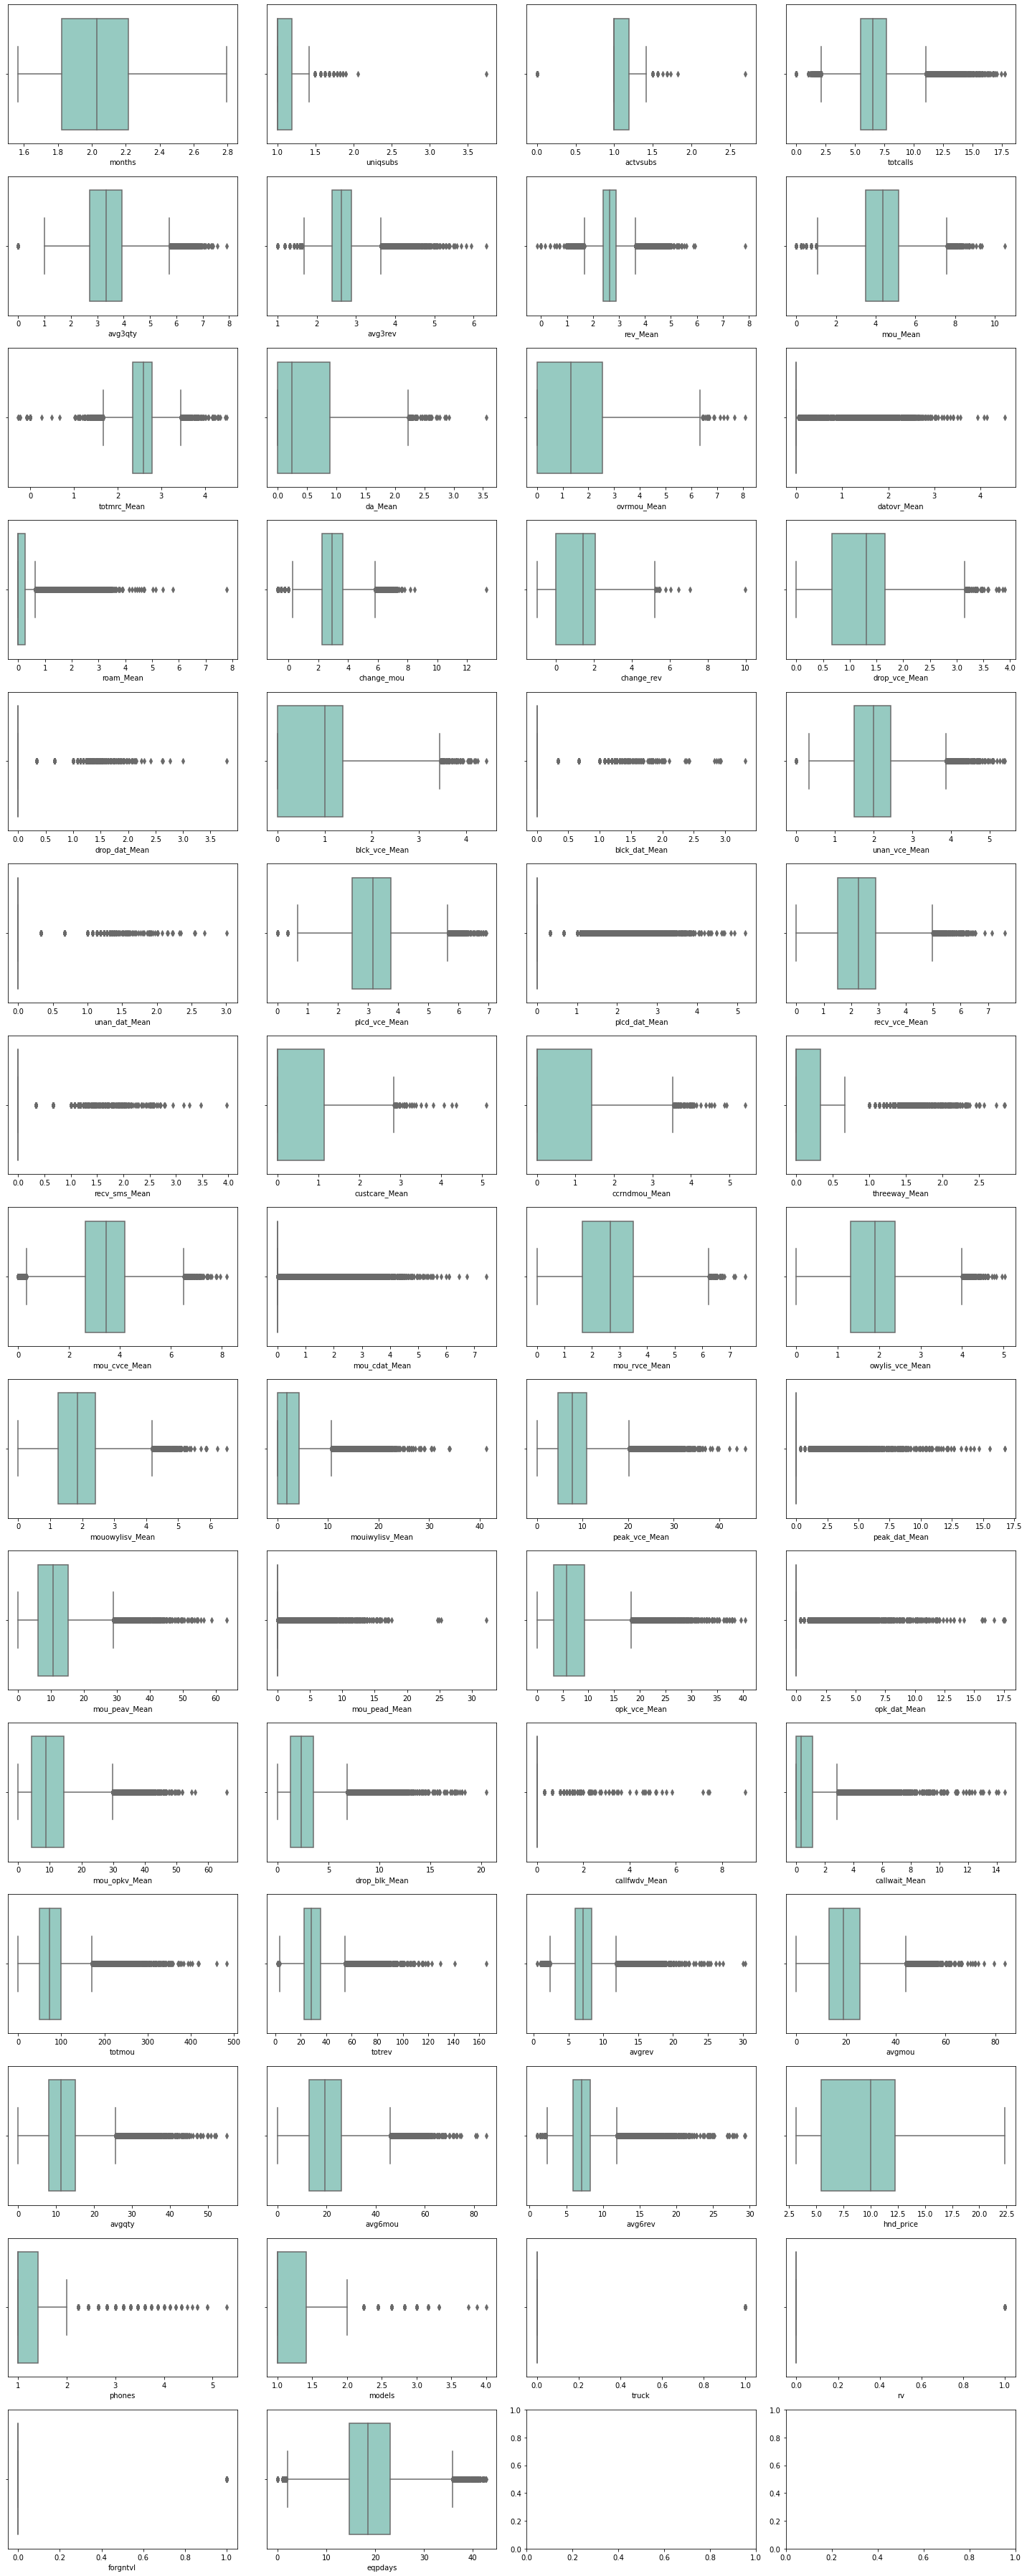

In [ ]:
fig, ax = plt.subplots(15, 4, figsize = (20, 50))
ax = ax.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x = df[c], ax = ax[i], palette = 'Set3')
fig.tight_layout()

<a id = "12"></a><br>
# 6 | Detecção de Outliers

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1o quartil
        Q1 = np.percentile(df[c],25)
        # 3o quartil
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Cálculo do passo do outlier
        outlier_step = IQR * 1.5
        # Detectar o índice da variável que possui outliers
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Gravar o índice
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return outlier_indices

In [ ]:
df.loc[detect_outliers(df,['uniqsubs', 'actvsubs'])]

,churn,actvsubs,adjmou,adjqty,adjrev,area,asl_flag,attempt_Mean,avg3mou,avg3qty,...,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
14,0,1.000000,69104.08,33139,6572.70,NORTHWEST/ROCKY MOUNTAIN AREA,N,344.666667,2038,5.023829,...,0.000000,13.496843,262.984949,3.036281,81.343223,0.0,0.000000,2.570618,1.495349,99.800
28,1,1.414214,42354.00,17729,3530.39,NEW ENGLAND AREA,N,284.666667,796,4.216206,...,1.000000,11.569223,206.676075,3.121903,61.881580,0.0,0.000000,2.899370,1.495349,7.125
47,1,1.414214,32612.00,14853,3127.38,CENTRAL/SOUTH TEXAS AREA,N,193.666667,920,4.284572,...,0.000000,11.055181,181.030384,3.036370,56.461314,0.0,0.000000,2.618330,1.495349,0.000
76,1,1.189207,51060.21,15736,3856.34,CENTRAL/SOUTH TEXAS AREA,N,468.000000,1707,4.700077,...,0.000000,11.212224,226.376265,1.778279,62.899444,0.0,0.000000,2.627566,1.495349,11.100
101,0,1.414214,73368.10,25898,4667.67,CENTRAL/SOUTH TEXAS AREA,N,404.000000,1709,5.119637,...,0.000000,12.686497,270.885775,3.018349,68.945196,0.0,0.333333,2.189939,1.565085,1.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95533,1,0.000000,6445.00,2008,450.56,PHILADELPHIA AREA,Y,0.000000,1328,4.553728,...,0.000000,6.696579,80.336791,3.013702,23.161174,0.0,0.000000,0.000000,1.000000,0.000
95574,0,0.000000,3415.00,1301,637.91,MIDWEST AREA,N,226.666667,839,4.229485,...,0.000000,6.005779,58.438001,2.956880,26.903346,0.0,0.000000,2.258101,1.189207,104.100
95640,1,0.000000,2180.00,913,291.59,SOUTHWEST AREA,N,285.000000,660,4.061086,...,1.136219,5.649936,50.299105,2.727130,20.496341,0.0,0.000000,2.498999,1.189207,28.800
95658,0,0.000000,3003.00,1457,378.89,NEW YORK CITY AREA,Y,429.000000,498,3.944154,...,0.000000,6.187760,55.018179,2.474863,21.201415,0.0,0.000000,3.156994,1.000000,42.800


In [ ]:
# eliminar outliers
df = df.drop(detect_outliers(df,['uniqsubs', 'actvsubs']),axis = 0).reset_index(drop = True)

<a id = "13"></a><br>
# 7 | Feature Engineering

<a id = "14"></a><br>
# One-hot encoding
- Antes de olhar pra correlação, transformar as variáveis categóricas em numéricas utilizando get_dummies

In [ ]:
encoding_col=[]
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].nunique())
    encoding_col.append(i)

area --> 19
asl_flag --> 2
creditcd --> 2
dualband --> 3
ethnic --> 17
hnd_webcap --> 3
kid0_2 --> 2
kid11_15 --> 2
kid16_17 --> 2
kid3_5 --> 2
kid6_10 --> 2
marital --> 5
new_cell --> 3
refurb_new --> 2


In [ ]:
# one-hot encoding para variáveis com mais de duas categorias
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True, columns = encoding_col, prefix = encoding_col)

In [ ]:
display(df.shape)
display(df2.shape)

(96048, 87)

(96048, 125)

In [ ]:
# Matriz de correlação
corr_matrix = df.corr().abs()

# Matriz de correlação é simétrica - selecionar somente a parte superior da matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Achar índices das variáveis que possuem correlação maior que 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Eliminar variáveis
df.drop(df[to_drop], axis=1,inplace=True)

<a id = "15"></a><br>
# Ordem crescente das correlações entre as variáveis e o churn

In [ ]:
c = df.corr()['churn'].abs()
sc = c.sort_values()
sc

rv               0.000029
change_mou       0.001275
adjrev           0.001935
totmou           0.002446
recv_sms_Mean    0.003967
                   ...   
mou_cvce_Mean    0.072594
mou_Mean         0.082138
hnd_price        0.105104
eqpdays          0.117994
churn            1.000000
Name: churn, Length: 66, dtype: float64

In [ ]:
a = dict(sc.tail(40))
b = a.keys()
print(sorted(b))

['actvsubs', 'attempt_Mean', 'avg3mou', 'avg3qty', 'avg6mou', 'avg6qty', 'avg6rev', 'blck_vce_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'churn', 'da_Mean', 'drop_blk_Mean', 'drop_vce_Mean', 'eqpdays', 'hnd_price', 'inonemin_Mean', 'models', 'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkv_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouowylisv_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'peak_vce_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_vce_Mean', 'threeway_Mean', 'totmrc_Mean', 'unan_vce_Mean', 'uniqsubs']


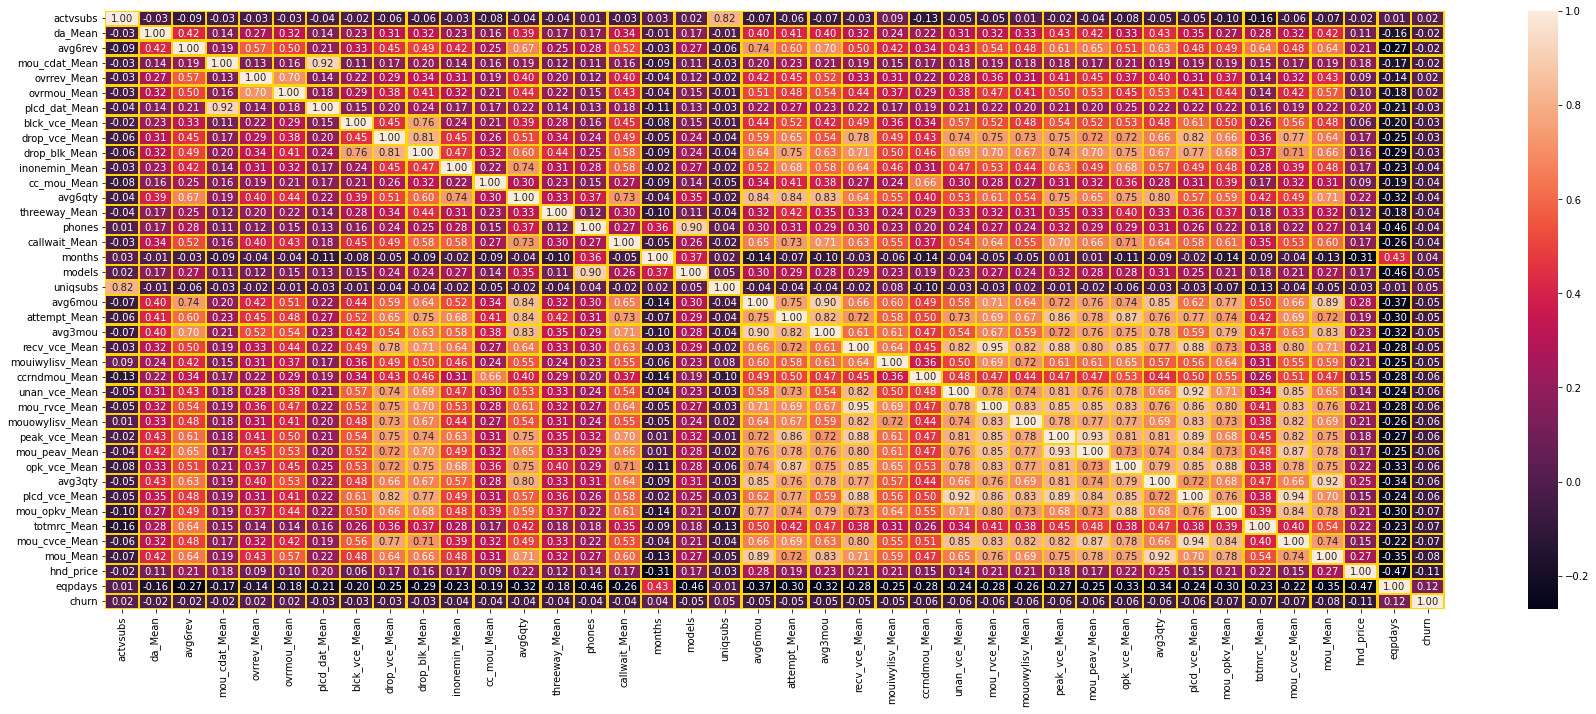

In [ ]:
plt.figure(figsize=(30,11))
sns.heatmap(df2[b].corr(), annot = True, fmt = ".2f",robust=True,linewidths=1.3,linecolor = 'gold')
plt.show()

<AxesSubplot:>

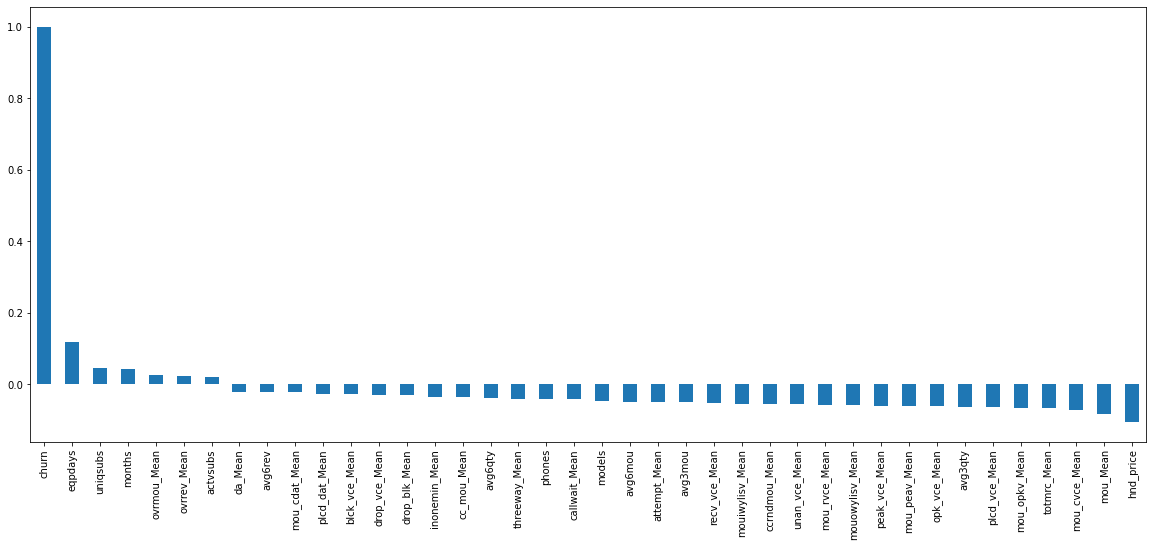

In [ ]:
# Correlação das variáveis somente com o churn
plt.figure(figsize=(20,8))
df2[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar')

<a id = "16"></a><br>
# 8 | Modelos

In [112]:
# Importar algoritmos de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importar métricas de avaliação de performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

#Separar conjuntos de dados de treino e teste
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

<a id = "17"></a><br>
# Separação entre treino e teste

In [113]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 76838
X_test 19210
y_train 76838
y_test 19210


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Definindo uma função para criação dos modelos
def modeling(alg, alg_name, params={}):
    model = alg(**params) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
      
    #Avaliação de desempenho
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("acurácia: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precisão: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)        
    print_scores(alg, y_test, y_pred)
    
    
    cm = confusion_matrix(y_test, y_pred)
    #Criar objeto da visualização da matriz de confusão(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'semchurn'])

    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title='Matriz de Confusão!!', 
                    xlabel='Previsão de Churn', 
                    ylabel='Churn Real')
    #Chamando função show() do matplotlib para visualizar a Matriz de Confusão
    plt.show()
    
    return model

In [ ]:
# Modelo Random Forest
RF_model = modeling(RandomForestClassifier, 'Random Forest')

In [ ]:
#Arvore de Decisão
dt_model = modeling(DecisionTreeClassifier, "Árvore de Decisão")

In [ ]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes")

In [ ]:
# Ada Boost
ada_model=modeling(AdaBoostClassifier, "Ada Boost")

In [ ]:
# Gradient Boosting
gbm_model=modeling(GradientBoostingClassifier, "Gradient Boosting")

<a id = "18"></a><br>
## Conclusão

Este notebook apresentou o racional do desenvolvimento de modelos de Machine Learning para uma base de dados de churn. Iniciou-se com a análise exploratória dos dados (EDA - _Exploratory Data Analysis_), passando pela limpeza e posterior treinamento. Cinco modelos foram escolhidos e o resultado final é mostrado abaixo: 

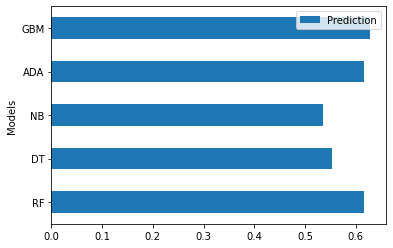

In [121]:
df = pd.DataFrame({'Models':['RF','DT', 'NB','ADA','GBM'], 'Prediction':[0.617, 0.553, 0.535 ,0.617, 0.629]})
ax = df.plot.barh(x='Models', y='Prediction', rot=0)

Neste estudo, o modelo com melhor acurácia foi o Gradient Boosting, todavia a utilização real deste modelo como uma ferramenta de previsão de churn não é recomendada visto que o resultado é apenas levemente superior ao baseline (lançamento de uma moeda - 50% de chance).

<a id = "19"></a><br>
## Sugestões de Melhoria

- Testar outros modelos (LightGBM, por exemplo)
- Trabalhar com a quantidade de variáveis independentes
- Aprender sobre as regras de negócio. Embora a utilização de técnicas de Machine Learning tragam à tona relações entre os dados que possam passar despercebidas, o conhecimento do negócio, em especial as relações de causa e efeitos das variáveis do conjunto de dados, geralmente costuma trazer resultados satisfatórios.